# Computer Vision
#### Author : ishandeveloper
Computer vision is the field of having a computer understand and label what is present in an image.

One way to achieve this is to use lots of pictures of clothing and tell the computer what that's a picture of and then have the computer figure out the patterns that give you the difference between a shoe, and a shirt, and a handbag, and a coat for example. That's what we're going to learn how to do in this section. 

#### Getting Dependencies

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

We'll be using <b>'Fashion MNIST dataset'</b> for this, which contains more than 70,000 images of clothes categorized into different items such as shirts, shoes etc. each scaled down to a resolution of 28x28 pixels

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

↑ Importing MNIST dataset using Tensorflow API Call

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu ),
    keras.layers.Dense(10,  activation=tf.nn.softmax)
]) 

↑ Now we have three layers. The important things to look at are the first and the last layers. The last layer has 10 neurons in it because we have ten classes of clothing in the dataset. They should always match. The first layer is a flatten layer with the input shaping 28 by 28. Now, if you remember our images are 28 by 28, so we're specifying that this is the shape that we should expect the data to be in. Flatten takes this 28 by 28 square and turns it into a simple linear array. The interesting stuff happens in the middle layer, sometimes also called a hidden layer. This is a 128 neurons in it, and I'd like you to think about these as variables in a function. Maybe call them x1, x2 x3, etc. Now, there exists a rule that incorporates all of these that turns the 784 values of an ankle boot into the value nine, and similar for all of the other 70,000. 

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

### For Example
Let's plot these raw values as an image to make it easier to inspect. I can also print out the raw values so we can see what they look like. Here you can see the raw values for the pixel numbers from zero to 255,

This Image Is Labelled By The Neural Network As 9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0

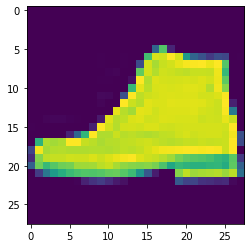

In [32]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42])
print('This Image Is Labelled By The Neural Network As ' + str(train_labels[42]))
print(train_images[42])

Look how the plotted values above are actually forming a rough shape of the ankle boot.

Now, Our image has values from zero to 255, but <b>neural networks work better with normalized data</b>. So, let's change it to between zero and one simply by dividing every value by 255. In Python, you can actually divide an entire array with one line of code like this.

In [33]:
train_images = train_images / 255.0
test_images = test_images /255.0

In [35]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 2.3028 - accuracy: 0.0979
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 2.3028 - accuracy: 0.0973
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 2.3028 - accuracy: 0.0963
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 2.3027 - accuracy: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3028 - accuracy: 0.0985
